In [1]:
import pandas as pd
titan=pd.read_csv("C:/Users/Nisha/OneDrive/Desktop/Titanic-Dataset.csv")

In [2]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
missing_values = titan.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [31]:
# Drop columns that are non-numeric and not useful for prediction
titan = titan.drop(columns=['Name', 'Ticket', 'Cabin','PassengerId'])

In [32]:
# Handle missing values: You can choose to fill them with mean/median or drop rows
titan['Age'].fillna(titan['Age'].median(), inplace=True)
titan['Embarked'].fillna(titan['Embarked'].mode()[0], inplace=True)

In [33]:
missing_values_after = titan.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [34]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
titan['Sex'] = le.fit_transform(titan['Sex'])
titan['Embarked'] = le.fit_transform(titan['Embarked'])
print(titan.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


# Bar plot

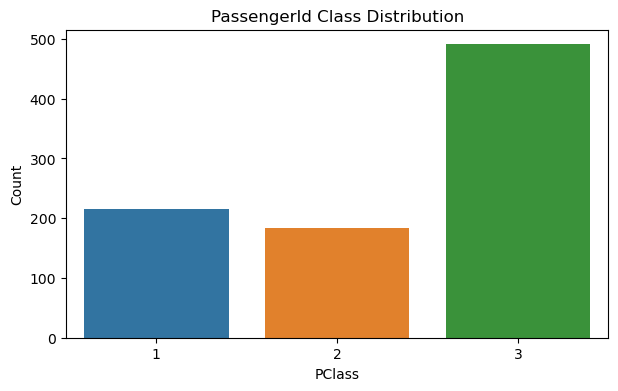

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# Bar plot for passenger class count
plt.figure(figsize=(7, 4))
sns.countplot(data=titan, x='Pclass')
plt.title('PassengerId Class Distribution')
plt.xlabel('PClass')
plt.ylabel('Count')
plt.show()

# Scatter plot

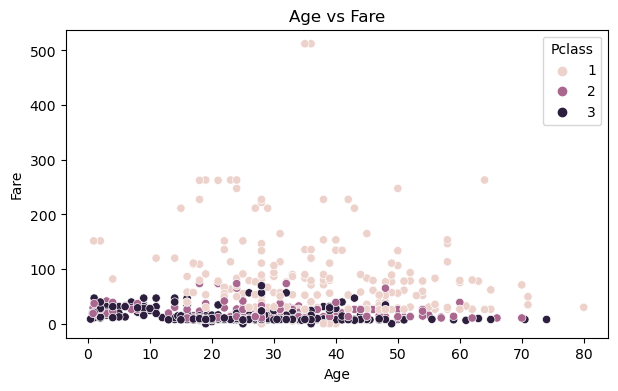

In [36]:
# Scatter plot for Age vs Fare
plt.figure(figsize=(7, 4))
sns.scatterplot(data=titan, x='Age', y='Fare', hue='Pclass')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Joint plot

C:\Users\Nisha\Downloads\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nisha\Downloads\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


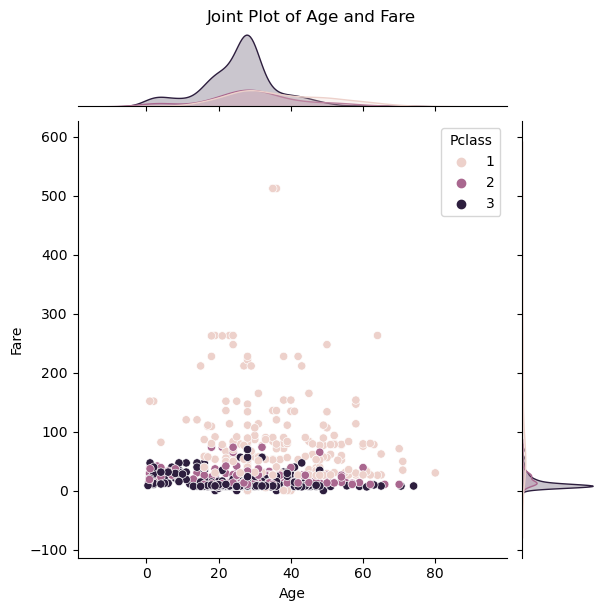

In [37]:
# Joint plot for Age vs Fare
sns.jointplot(data=titan, x='Age', y='Fare', hue='Pclass')
plt.suptitle('Joint Plot of Age and Fare', y=1.01)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Pie chart

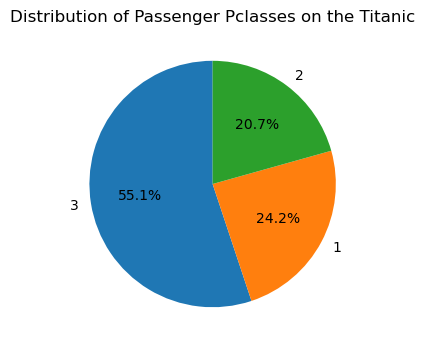

In [38]:
# Create a pie chart for the 'Pclass' column
Pclass_counts = titan['Pclass'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Pclass_counts, labels=Pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passenger Pclasses on the Titanic')
plt.show()

# Model Bulding:

* 1. choose the dependent and independent variable :

In [39]:
dependent_variable = 'Survived'
independent_variables = titan.columns.tolist()
independent_variables.remove(dependent_variable)
print(dependent_variable)
print(independent_variables)

Survived
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


* 2. Split data into train test ,80:20

In [40]:
from sklearn.model_selection import train_test_split

# Separate the independent variables (X) and the dependent variable (y)
X = titan[independent_variables]
y = titan[dependent_variable]

# Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)


* 3. fit naive bays model on train data

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score,precision_score

#Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [53]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
recall=recall_score(y_test, y_pred)
print(recall)

Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[96 15]
 [18 50]]
0.7352941176470589


# Model evaluation

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
recall=recall_score(y_test, y_pred)
print(recall)

Accuracy: 0.8156424581005587

Confusion Matrix:
 [[96 15]
 [18 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

0.7352941176470589


# knn algorithm

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
recall=recall_score(y_test, y_pred)

print(recall)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

0.6323529411764706
Accuracy: 0.7597765363128491
Confusion Matrix:
[[93 18]
 [25 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       111
           1       0.70      0.63      0.67        68

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



# Decision tree

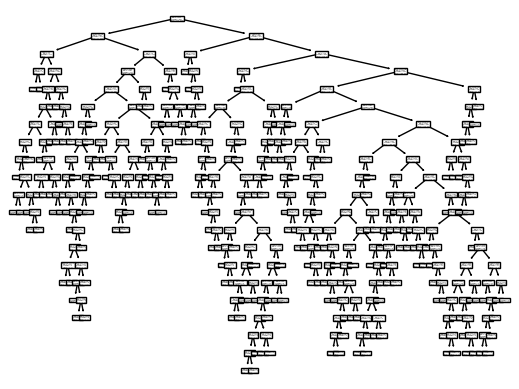

In [56]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
X = titan[independent_variables]
y = titan[dependent_variable]
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=independent_variables)
plt.show()

In [57]:
d_y_pred=dtree.predict(X_test)
d_y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, d_y_pred)
conf_matrix = confusion_matrix(y_test, d_y_pred)
class_report = classification_report(y_test, d_y_pred)
recall=recall_score(y_test, y_pred)

print(recall)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

0.6323529411764706
Accuracy: 0.9720670391061452
Confusion Matrix:
[[111   0]
 [  5  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       111
           1       1.00      0.93      0.96        68

    accuracy                           0.97       179
   macro avg       0.98      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179



# Comparison

In [59]:
models={'Naive Bayes':GaussianNB(),'knn' :KNeighborsClassifier(n_neighbors=5) ,'dtree' :DecisionTreeClassifier()}

In [61]:
Res=[]
for model_name,model in models.items():
    model.fit(X_train,y_train)
    predict_Y=model.predict(X_test)
    accuracy=accuracy_score(y_test,predict_Y)
    precision=precision_score(y_test,predict_Y)
    recall=recall_score(y_test,predict_Y)
    Res.append({"Model":model_name,"Accuracy":accuracy,"Precision":precision,"Recall":recall})

In [62]:
import pandas as pd
Result=pd.DataFrame(Res)
print(Result)

         Model  Accuracy  Precision    Recall
0  Naive Bayes  0.815642   0.769231  0.735294
1          knn  0.759777   0.704918  0.632353
2        dtree  0.821229   0.781250  0.735294
